<a href="https://colab.research.google.com/github/AnanyaCSE-039/ML-LAB/blob/main/1BM22CS039_Lab_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


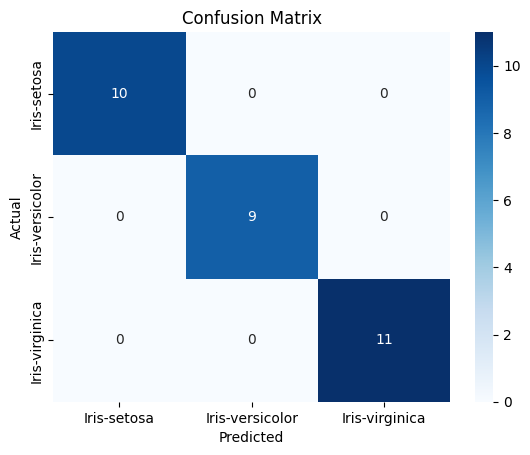

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load IRIS dataset
iris_data = pd.read_csv("iris.csv")

# Split dataset into features and target
X_iris = iris_data.iloc[:, :-1]  # Features (all columns except last)
y_iris = iris_data.iloc[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 3  # Chosen value of k (you can tune this for better results)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_classifier.fit(X_train_iris, y_train_iris)

# Predict on the test data
y_pred_iris = knn_classifier.predict(X_test_iris)

# Evaluate the model
accuracy = accuracy_score(y_test_iris, y_pred_iris)
conf_matrix = confusion_matrix(y_test_iris, y_pred_iris)
class_report = classification_report(y_test_iris, y_pred_iris)

# Display the accuracy score
print(f"Accuracy Score: {accuracy}")

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris_data['species'].unique(), yticklabels=iris_data['species'].unique())
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display the classification report
print("Classification Report:")
print(class_report)


Best k value: 11
Accuracy Score: 0.7077922077922078
Confusion Matrix:
[[78 21]
 [24 31]]


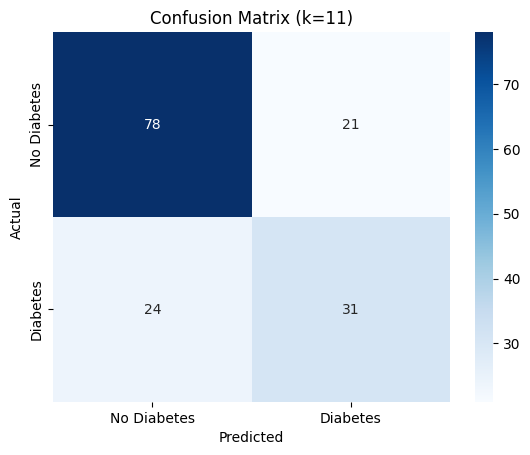

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")

# Split dataset into features and target
X_diabetes = diabetes_data.iloc[:, :-1]  # Features (all columns except last)
y_diabetes = diabetes_data.iloc[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_diabetes = scaler.fit_transform(X_train_diabetes)
X_test_diabetes = scaler.transform(X_test_diabetes)

# Hyperparameter tuning: Try different values of k and use cross-validation
k_values = range(1, 21)  # Try values of k from 1 to 20
best_k = 1
best_score = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train_diabetes, y_train_diabetes, cv=5, scoring='accuracy')  # 5-fold cross-validation
    avg_score = cv_scores.mean()

    if avg_score > best_score:
        best_score = avg_score
        best_k = k

# Train the model with the best k value
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train_diabetes, y_train_diabetes)

# Predict on the test data
y_pred_diabetes = knn_classifier.predict(X_test_diabetes)

# Evaluate the model
accuracy = accuracy_score(y_test_diabetes, y_pred_diabetes)
conf_matrix = confusion_matrix(y_test_diabetes, y_pred_diabetes)

# Display the best k and accuracy score
print(f"Best k value: {best_k}")
print(f"Accuracy Score: {accuracy}")

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f"Confusion Matrix (k={best_k})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best k value: 7 with accuracy: 0.9180327868852459
Accuracy Score: 0.9180327868852459
Confusion Matrix:
[[27  2]
 [ 3 29]]


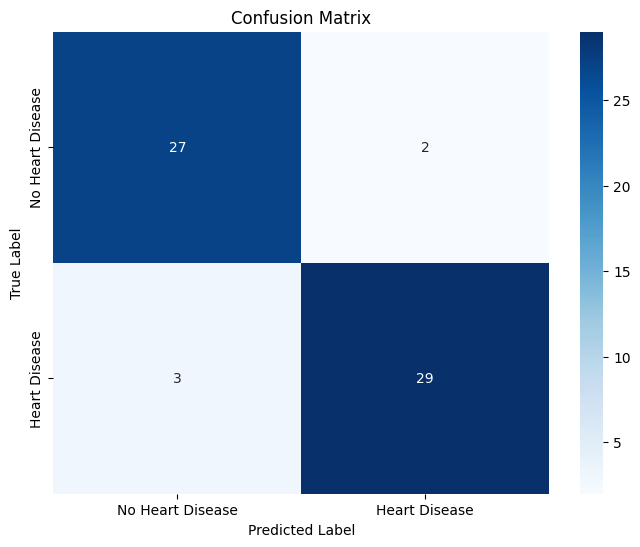

Classification Report as Table:
              precision    recall  f1-score    support
0              0.900000  0.931034  0.915254  29.000000
1              0.935484  0.906250  0.920635  32.000000
accuracy       0.918033  0.918033  0.918033   0.918033
macro avg      0.917742  0.918642  0.917945  61.000000
weighted avg   0.918614  0.918033  0.918077  61.000000


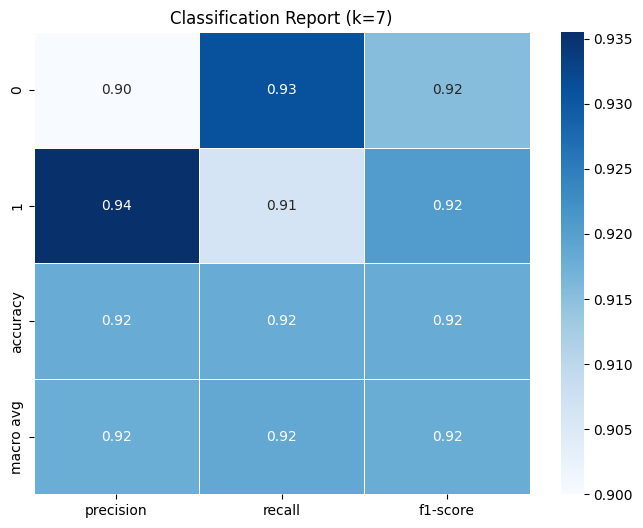

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the heart dataset
heart_data = pd.read_csv("/content/heart.csv")

# Split the data into features (X) and target (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value
best_k = 1
best_accuracy = 0
for k in range(1, 21):  # Try k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k} with accuracy: {best_accuracy}")

# Initialize and train the KNN classifier with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)  # Get classification report as dictionary

# Display the accuracy score
print(f"Accuracy Score: {accuracy}")

# Display the confusion matrix with proper labels and visualization
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Convert classification report to DataFrame for tabular representation
class_report_df = pd.DataFrame(class_report).transpose()
print("Classification Report as Table:")
print(class_report_df)

# Optionally, display it as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1].astype(float), annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title(f"Classification Report (k={best_k})")
plt.show()
